In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 0, 'Age in years')

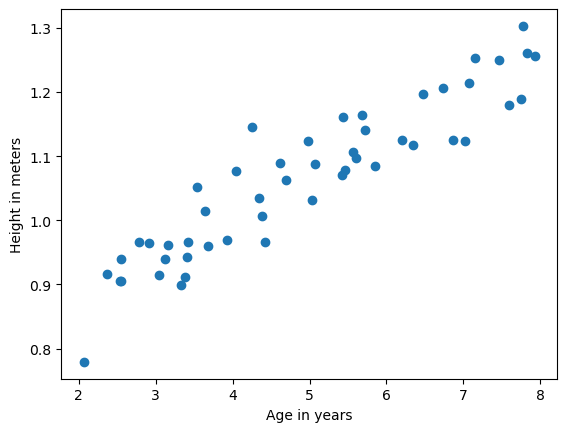

In [2]:
# 加载数据
x = torch.tensor(np.loadtxt('ex1x.dat'), dtype=torch.float32)
y = torch.tensor(np.loadtxt('ex1y.dat'), dtype=torch.float32)
x0 = x  # 保存初始的x
plt.plot(x, y, 'o')
plt.ylabel("Height in meters") 
plt.xlabel("Age in years")

In [3]:
print(f'x:{x}\n')
print(f'y:{y}\n')

x:tensor([2.0659, 2.3684, 2.5400, 2.5421, 2.5491, 2.7867, 2.9117, 3.0356, 3.1147,
        3.1582, 3.3276, 3.3793, 3.4122, 3.4216, 3.5316, 3.6393, 3.6733, 3.9256,
        4.0499, 4.2483, 4.3440, 4.3827, 4.4231, 4.6102, 4.6881, 4.9777, 5.0360,
        5.0685, 5.4161, 5.4396, 5.4563, 5.5698, 5.6016, 5.6878, 5.7216, 5.8539,
        6.1978, 6.3511, 6.4797, 6.7384, 6.8638, 7.0223, 7.0782, 7.1514, 7.4664,
        7.5974, 7.7441, 7.7730, 7.8265, 7.9306])

y:tensor([0.7792, 0.9160, 0.9054, 0.9057, 0.9390, 0.9668, 0.9644, 0.9145, 0.9393,
        0.9607, 0.8984, 0.9121, 0.9424, 0.9662, 1.0526, 1.0144, 0.9597, 0.9685,
        1.0766, 1.1455, 1.0341, 1.0070, 0.9668, 1.0896, 1.0634, 1.1237, 1.0323,
        1.0874, 1.0703, 1.1606, 1.0778, 1.1070, 1.0972, 1.1649, 1.1412, 1.0844,
        1.1252, 1.1168, 1.1971, 1.2069, 1.1251, 1.1236, 1.2133, 1.2523, 1.2497,
        1.1800, 1.1897, 1.3030, 1.2601, 1.2562])



In [4]:
# m = y.size(0)
# print(m)
# 变为列向量
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print(x)
print(y)

tensor([[2.0659],
        [2.3684],
        [2.5400],
        [2.5421],
        [2.5491],
        [2.7867],
        [2.9117],
        [3.0356],
        [3.1147],
        [3.1582],
        [3.3276],
        [3.3793],
        [3.4122],
        [3.4216],
        [3.5316],
        [3.6393],
        [3.6733],
        [3.9256],
        [4.0499],
        [4.2483],
        [4.3440],
        [4.3827],
        [4.4231],
        [4.6102],
        [4.6881],
        [4.9777],
        [5.0360],
        [5.0685],
        [5.4161],
        [5.4396],
        [5.4563],
        [5.5698],
        [5.6016],
        [5.6878],
        [5.7216],
        [5.8539],
        [6.1978],
        [6.3511],
        [6.4797],
        [6.7384],
        [6.8638],
        [7.0223],
        [7.0782],
        [7.1514],
        [7.4664],
        [7.5974],
        [7.7441],
        [7.7730],
        [7.8265],
        [7.9306]])
tensor([[0.7792],
        [0.9160],
        [0.9054],
        [0.9057],
        [0.9390],
        [

In [5]:
m = y.size(0)
# print(m)
new_colunm = torch.ones(m).reshape(-1,1)
# print(new_colunm)
x = torch.cat((x, new_colunm), dim=1)
print(x)

tensor([[2.0659, 1.0000],
        [2.3684, 1.0000],
        [2.5400, 1.0000],
        [2.5421, 1.0000],
        [2.5491, 1.0000],
        [2.7867, 1.0000],
        [2.9117, 1.0000],
        [3.0356, 1.0000],
        [3.1147, 1.0000],
        [3.1582, 1.0000],
        [3.3276, 1.0000],
        [3.3793, 1.0000],
        [3.4122, 1.0000],
        [3.4216, 1.0000],
        [3.5316, 1.0000],
        [3.6393, 1.0000],
        [3.6733, 1.0000],
        [3.9256, 1.0000],
        [4.0499, 1.0000],
        [4.2483, 1.0000],
        [4.3440, 1.0000],
        [4.3827, 1.0000],
        [4.4231, 1.0000],
        [4.6102, 1.0000],
        [4.6881, 1.0000],
        [4.9777, 1.0000],
        [5.0360, 1.0000],
        [5.0685, 1.0000],
        [5.4161, 1.0000],
        [5.4396, 1.0000],
        [5.4563, 1.0000],
        [5.5698, 1.0000],
        [5.6016, 1.0000],
        [5.6878, 1.0000],
        [5.7216, 1.0000],
        [5.8539, 1.0000],
        [6.1978, 1.0000],
        [6.3511, 1.0000],
        [6.4

In [6]:
# 初始化模型参数: xw
# w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
w = torch.zeros(2, 1, requires_grad=True)  # 按照题目要求初始化为0
print(w[0])  
print(w[1])
print(type(w))
print(w)

tensor([0.], grad_fn=<SelectBackward0>)
tensor([0.], grad_fn=<SelectBackward0>)
<class 'torch.Tensor'>
tensor([[0.],
        [0.]], requires_grad=True)


In [7]:
batch_size = 50  # 每次训练都遍历整个数据集

# 定义模型
def LinearRegession(X, w):
    return torch.matmul(X, w)


In [8]:
# 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) **2 /2

In [9]:
# 定义梯度下降算法
def GD(params, alpha, batch_size=50):
    """
    分别为 参数，学习率，批量大小 
    """
    with torch.no_grad():
        for param in params:
            param -= alpha * param.grad / batch_size
            param.grad.zero_()

第1轮：loss：28.68662452697754

第2轮：loss：26.75654411315918

第3轮：loss：24.960594177246094

第4轮：loss：23.289377212524414

第5轮：loss：21.734172821044922

第6轮：loss：20.28687286376953

第7轮：loss：18.939910888671875

第8轮：loss：17.686298370361328

第9轮：loss：16.519506454467773

第10轮：loss：15.4334716796875

第11轮：loss：14.422536849975586

第12轮：loss：13.48145866394043

第13轮：loss：12.605361938476562

第14轮：loss：11.789703369140625

第15轮：loss：11.030258178710938

第16轮：loss：10.323114395141602

第17轮：loss：9.664603233337402

第18轮：loss：9.051340103149414

第19轮：loss：8.480164527893066

第20轮：loss：7.948141098022461

第21轮：loss：7.4525465965271

第22轮：loss：6.990837574005127

第23轮：loss：6.560645580291748

第24轮：loss：6.159778594970703

第25轮：loss：5.786191463470459

第26轮：loss：5.437984466552734

第27轮：loss：5.113398551940918

第28轮：loss：4.810784816741943

第29轮：loss：4.528615474700928

第30轮：loss：4.265467643737793

第31轮：loss：4.020018577575684

第32轮：loss：3.791041135787964

第33轮：loss：3.5773918628692627

第34轮：loss：3.3780055046081543

第35轮：loss：3.1

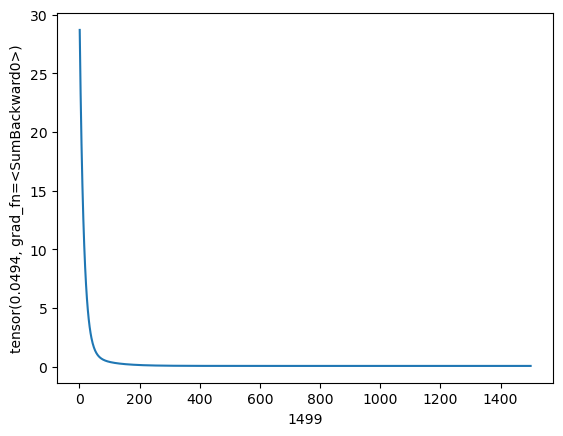

In [10]:
# 初始化训练参数
alpha = 0.07
num_epochs = 1500

xx = [i for i in range(1, 1500 + 1)]
yy = []
w0first_w = w[0].tolist()
w1first_b = w[1].tolist()

w0final_w = w[0].tolist()
w1final_b = w[1].tolist()

for epoch in range(num_epochs):
    loss = squared_loss(LinearRegession(x, w), y)   # 此处loss为m维的tensor，应该先求和再反向传播
    # print(f'第{epoch + 1}轮：loss：{loss}\n')  
    loss = loss.sum() 
    loss.backward()
    print(f'第{epoch + 1}轮：loss：{loss}\n') 
    a = loss.tolist()
    yy.append(a)
    # 更新梯度
    GD([w], alpha=alpha, batch_size=50)
    # record the value of w0 and w1:
    if epoch == 0:
        w0first_w = w[0]
        w1first_b = w[1]

w0final_w = w[0].tolist()
w1final_b = w[1].tolist()
    
# 绘制loss的图像：
plt.plot(xx, yy)
plt.ylabel(loss)
plt.xlabel(epoch)

print(f'w0first_w: {w0first_w}\n')
print(f'w1first_b: {w1first_b}\n')
print(f'w0final_w: {w0final_w}\n')
print(f'w1final_b: {w1final_b}\n')

<class 'float'>


Text(0.5, 0, 'Age in years')

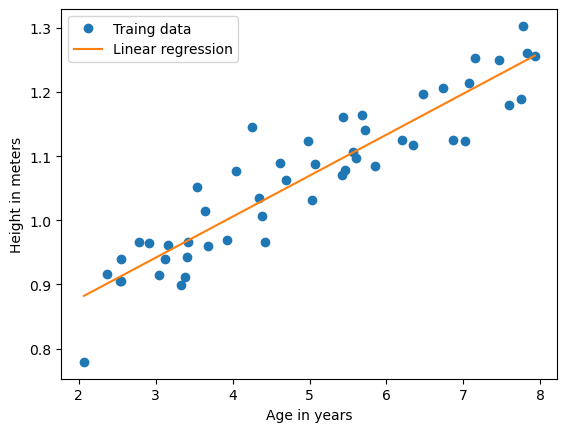

In [11]:
print(type(w0final_w[0]))   # list转为float
def outcome(x):
    return w0final_w[0] * x + w1final_b[0]
yfinal = []
for _ in x0:
    yfinal.append(outcome(_.tolist()))
    
plt.plot(x0, y, 'o')
plt.plot(x0, yfinal)
plt.legend(["Traing data","Linear regression"])
plt.ylabel("Height in meters") 
plt.xlabel("Age in years")


In [12]:
# 预测
x1 = 3.5
x2 = 7
y1 = outcome(x1)
y2 = outcome(x2)

print(f'the height for the boy of ages 3.5: {y1}\n')
print(f'the height for the boy of ages 7: {y2}\n')

the height for the boy of ages 3.5: 0.9737426117062569

the height for the boy of ages 7: 1.1973341256380081



In [13]:
import numpy as np
import matplotlib.pyplot as plt
m = 50
# 初始化 J_vals 和 theta0_vals，theta1_vals 数组
J_vals = np.zeros((100, 100))
theta0_vals = np.linspace(-3, 3, 100)
theta1_vals = np.linspace(-1, 1, 100)
x = x.numpy()
y = y.numpy()
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
# 遍历 theta0 和 theta1 值
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = (1/(2*m)) * np.dot(np.dot(x, t) - y, np.dot(x, t) - y)

# 将 J_vals 转置
J_vals = J_vals.T

# 绘制三维表面图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta0, theta1, J_vals, cmap='viridis')
ax.set_xlabel('\u03B8_0')  # θ_0
ax.set_ylabel('\u03B8_1')  # θ_1
ax.set_zlabel('J(\u03B8)')  # J(θ)

# 绘制轮廓图
plt.figure()
plt.contour(theta0, theta1, J_vals, levels=np.logspace(-3, 3, 20))
plt.xlabel('\u03B8_0')  # θ_0
plt.ylabel('\u03B8_1')  # θ_1
plt.show()


ValueError: setting an array element with a sequence.